使用VGG16的结构提取图像特征，再根据特征建立lp模型，实现猫狗图像识别。训练/测试数据: dataset\data_vgg:
1.对数据进行分离、计算测试数据预测准确率
2.从网站下载猫/狗图片，对其进行预测
mlp模型一个隐藏层，10个神经元

In [4]:
# load the data
from keras.preprocessing.image import load_img,img_to_array

img_path = 'dog.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
type(img)

numpy.ndarray

In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet',include_top=False)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
print(x.shape)

58889256/58889256 [==============================] - 3s 0us/step
(1, 224, 224, 3)


In [6]:
# 特征提取
features = model_vgg.predict(x)
print(features.shape)

1/1 [==============================] - 0s 191ms/step
(1, 7, 7, 512)


In [8]:
# flatten
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


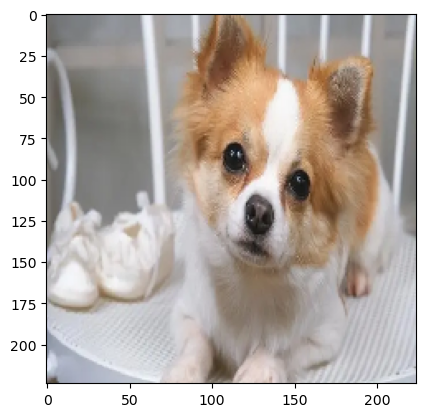

In [9]:
# visulize the data
from matplotlib import pyplot as plt
fig = plt.figure()
img = load_img(img_path,target_size=(224,224))
plt.imshow(img)

In [17]:
# load image and preprocess it with vgg16 structure
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet',include_top=False)
# define a method to load and preprocess the image
def modelProcess(img_path, model):
    img = load_img(img_path,target_size=(224,224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    
    return x_vgg

def flatten(name):
    # list file names if the training datasets
    import os
    folder = f'dataset/data_vgg/{name}'
    dirs = os.listdir(folder)
    # generate path for the images
    img_path = []
    for i in dirs:
        if os.path.splitext(i)[1] == '.jpg':
            img_path.append(i)
    img_path = [folder + '//' + i for i in img_path]

    # preprocess multiple images
    features = np.zeros([len(img_path),25088])
    for i in range(len(img_path)):
        features_i = modelProcess(img_path[i],model_vgg)
        print('preprocessed:',img_path[i])
        features[i] = features_i
    
    return features

features1 = flatten('cat')
features2 = flatten('dog')
# label the results
print(features1.shape,features2.shape)
y1 = np.zeros(540)
y2 = np.ones(540)

# generate the training data
X = np.concatenate((features1,features2), axis=0)
y = np.concatenate((y1,y2), axis=0)
y = y.reshape(-1,1)
print(X.shape, y.shape)

1/1 [==============================] - 0s 152ms/step
preprocessed: dataset/data_vgg/cat//cat.1.jpg
1/1 [==============================] - 0s 86ms/step
preprocessed: dataset/data_vgg/cat//cat.10.jpg
1/1 [==============================] - 0s 82ms/step
preprocessed: dataset/data_vgg/cat//cat.100.jpg
1/1 [==============================] - 0s 94ms/step
preprocessed: dataset/data_vgg/cat//cat.101.jpg
1/1 [==============================] - 0s 119ms/step
preprocessed: dataset/data_vgg/cat//cat.102.jpg
1/1 [==============================] - 0s 92ms/step
preprocessed: dataset/data_vgg/cat//cat.103.jpg
1/1 [==============================] - 0s 90ms/step
preprocessed: dataset/data_vgg/cat//cat.104.jpg
1/1 [==============================] - 0s 87ms/step
preprocessed: dataset/data_vgg/cat//cat.105.jpg
1/1 [==============================] - 0s 90ms/step
preprocessed: dataset/data_vgg/cat//cat.106.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset/data_vgg/cat//cat.107.jpg


In [18]:
# split the training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)
print(X_train.shape,X_test.shape,X.shape)

(756, 25088) (324, 25088) (1080, 25088)


In [19]:
# set up the mlp model
from keras.models import Sequential
from keras.layers  import Dense
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=25088))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                250890    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 250901 (980.08 KB)
Trainable params: 250901 (980.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#cinfigure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# train the model
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
24/24 [==============================] - 1s 4ms/step - loss: 1.4216 - accuracy: 0.7619
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.8148
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1181 - accuracy: 0.9458
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9854
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0692 - accuracy: 0.9828
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.9894
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0448 - accuracy: 0.9921
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9894
Epoch 9/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.9921
Epoch 10/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9921
Epoch 11/50
24/24 [

In [21]:
from sklearn.metrics import accuracy_score
y_train_predict = np.around(model.predict(X_train))
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

24/24 [==============================] - 0s 2ms/step
0.9920634920634921


In [22]:
# 測試準確率
y_test_predict = np.around(model.predict(X_test))
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

11/11 [==============================] - 0s 2ms/step
0.9228395061728395


In [25]:
img_path = 'dog.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = np.around(model.predict(features))
print(result)

1/1 [==============================] - 0s 17ms/step
[[1.]]


1/1 [==============================] - 0s 14ms/step


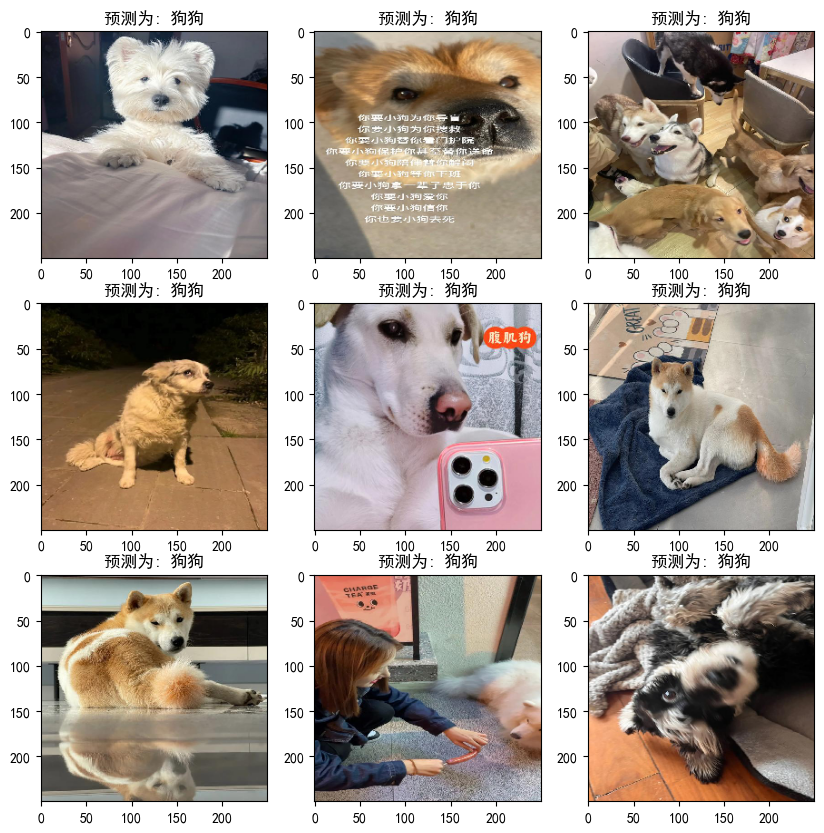

In [29]:
# make prediction on multiple images
# 多張圖片的預測
import matplotlib as mlp
font2 = {
    'family': 'SimHei',
    'weiight': 'normal',
    'size': 20
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

fig = plt.figure(figsize=(10,10))
a = [i for i in range(1,10)]
for i in a:
    img_name = './dataset/data_vgg/dog/dog.{i}.jpg'.format(i=i)
    img_ori = load_img(img_name,target_size=(224,224))
    img = img_to_array(img_ori)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model_vgg.predict(x)
    x_vgg = x_vgg.reshape(1,7*7*512)
    result = np.around(model.predict(x_vgg))
    img_ori = load_img(img_name,target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为: 狗狗' if result[0][0] == 1 else '预测为: 猫咪')
plt.show()

基于VGG16、结合mlp实现猫狗识别图像实战summaryimooc
1、基于经典的VGG16结构，实现了图像识别模型的快速搭建与训练，并完成猫狗识别任务:
2、掌握了拆分已经训练好的模型结构的方法，实现对其灵活应用;
3、更熟练的运用mlp模型，并将其与其他模型相结合，实现更复杂的任务;
4、通过VGG16+MLP的模型，实现了在小数据集情况下的模型快速训练并获得较高的准确率